# Take Home Assignment

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1157 non-null   object
 1   AUTHOR      1157 non-null   object
 2   DATE        1019 non-null   object
 3   CONTENT     1157 non-null   object
 4   CLASS       1157 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 45.3+ KB


In [4]:
df_train.shape

(1157, 5)

In [5]:
df_train.CLASS.value_counts()

1    586
0    571
Name: CLASS, dtype: int64

In [6]:
df_train.AUTHOR.nunique()

1094

In [7]:
df_test = pd.read_csv('test.csv')
df_test.head()

,ID,COMMENT_ID,AUTHOR,DATE,CONTENT
0,0,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...
1,1,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com
2,2,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a..."
3,3,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...
4,4,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          799 non-null    int64 
 1   COMMENT_ID  799 non-null    object
 2   AUTHOR      799 non-null    object
 3   DATE        692 non-null    object
 4   CONTENT     799 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.3+ KB


In [9]:
df_test.shape

(799, 5)

In [10]:
### Didn't consider comment_id,AUTHOR and Date from the dataFrame. As they are not the important variable to predict whether a content is based on advertisement or not. 

## Word Cloud

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 

In [124]:
data = df_train.copy()

In [125]:
data.head(5)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,huh anyway check out this you tube channel kob...,1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shake my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch v=vtarggvgtwq check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


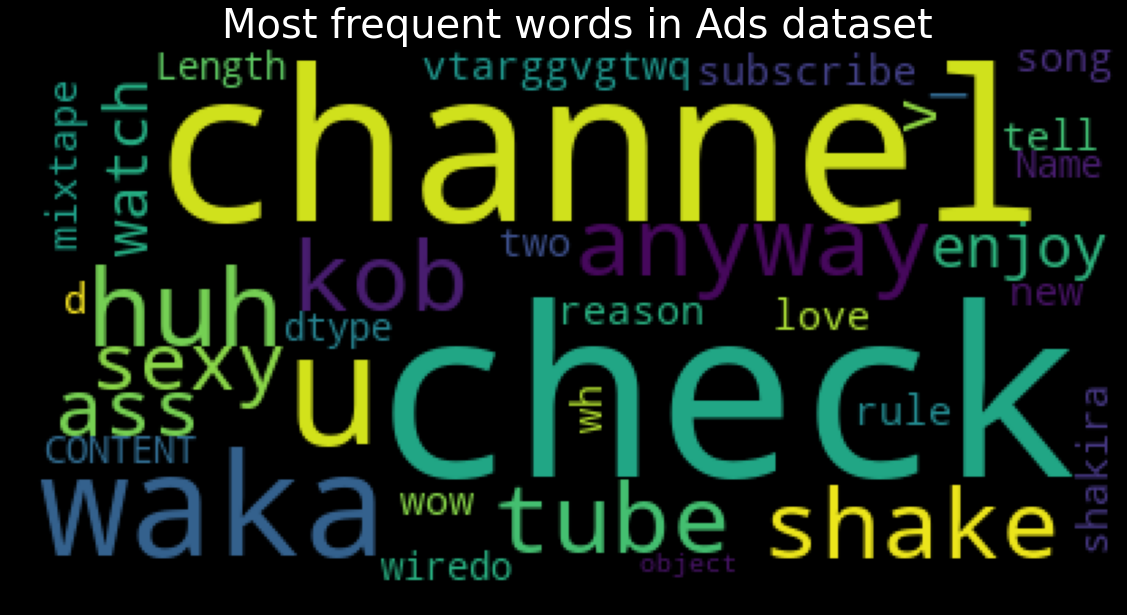

In [126]:
wc = WordCloud()
wc.generate(str(data['CONTENT']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Most frequent words in Ads dataset", fontsize=40,color='white')
plt.imshow(wc)
plt.show()

## Text Prepocessing

In [11]:
df_train.CONTENT = df_train.CONTENT.apply(lambda x: x.lower())
df_train.CONTENT = df_train.CONTENT.apply(lambda x: x.strip())
df_test.CONTENT = df_test.CONTENT.apply(lambda x: x.lower())
df_test.CONTENT = df_test.CONTENT.apply(lambda x: x.strip())

In [12]:
fun = lambda x: x.lower()

In [14]:
fun('hello i Am')

'hello i am'

In [19]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [12]:
wordnet_lemmatizer.lemmatize('running',pos='v')

'run'

In [13]:
wordnet_lemmatizer.lemmatize('artists',pos='n')

'artist'

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from nltk.tokenize import sent_tokenize, word_tokenize
def stemSentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    punctuations="?:!.,;[]"
    for word in sentence_words:
        if word in punctuations:
            sentence_words.remove(word)
    stem_sentence=[]
    for word in sentence_words:
        stem_sentence.append(wordnet_lemmatizer.lemmatize(word,pos="v"))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [20]:
nltk.word_tokenize('I am saihith reddy')

['I', 'am', 'saihith', 'reddy']

In [21]:
nltk.sent_tokenize('I am saihith reddy. Hi, hell')

['I am saihith reddy.', 'Hi, hell']

In [22]:
j = 0
for i in df_train.CONTENT:
    df_train.CONTENT[j] = stemSentence(i)
    j = j +1

<ipython-input-22-924d7888830d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.CONTENT[j] = stemSentence(i)


In [23]:
j = 0
for i in df_test.CONTENT:
    df_test.CONTENT[j] = stemSentence(i)
    j = j +1

<ipython-input-23-88e7b8df3042>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.CONTENT[j] = stemSentence(i)


In [24]:
df_train.CONTENT[0]

'huh anyway check out this you tube channel kobyoshi02 '

In [25]:
df_test.CONTENT[3]

'i turn it on mute as soon be i come on i just want to check the view ... \ufeff '

In [22]:
stemSentence(df_test.CONTENT[3])

'i turn it on mute as soon be i come on i just want to check the view ... \ufeff '

## Spliting the train data to check the performance with help of CountVectorizer

In [47]:
X = df_train['CONTENT']
y = df_train['CLASS']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [50]:
toNumeric = CountVectorizer(stop_words='english',token_pattern = '[a-zA-Z0-9]+',ngram_range=(1,2))

In [51]:
toNumeric.fit(X_train)

CountVectorizer(ngram_range=(1, 2), stop_words='english',
                token_pattern='[a-zA-Z0-9]+')

In [52]:
wordsCV = toNumeric.get_feature_names()

In [53]:
wordsCV

['0',
 '0 1',
 '0 amp',
 '0 h',
 '0 margin',
 '0 padding',
 '0 src',
 '000',
 '000 000',
 '000 comment',
 '000 month',
 '000 subscribers',
 '000 view',
 '034',
 '034 783',
 '04',
 '04 katy',
 '05',
 '05 hahahahah',
 '053012',
 '053012 jpg',
 '08',
 '08 little',
 '0d878a889c',
 '0f9fa8aa',
 '0f9fa8aa 243a',
 '0laviqu2b',
 '1',
 '1 000',
 '1 57',
 '1 710',
 '1 884',
 '1 africa',
 '1 amp',
 '1 bil',
 '1 billion',
 '1 day',
 '1 ff3',
 '1 icep',
 '1 lt',
 '1 mabey',
 '1 million',
 '1 millioon',
 '1 penny',
 '1 song',
 '1 thank',
 '1 waka',
 '1 year',
 '10',
 '10 months',
 '100',
 '100 100',
 '100 subs',
 '100 subscribers',
 '10000000',
 '10000000 subscribers',
 '10001',
 '10001 amp',
 '100877300245414',
 '100877300245414 https',
 '10200253113705769',
 '10200253113705769 amp',
 '1024',
 '1024 katy',
 '104999962146104962510',
 '104999962146104962510 oid',
 '104999962146104962510 supermariologan',
 '10626048',
 '10626048 expendables',
 '1073741828',
 '1073741828 1496241863981208',
 '1073741830

In [54]:
len(wordsCV)

7007

In [55]:
X_train_dtm = toNumeric.transform(X_train)

In [56]:
X_train_dtm

<809x7007 sparse matrix of type '<class 'numpy.int64'>'
	with 12945 stored elements in Compressed Sparse Row format>

In [57]:
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
X_test_dtm = toNumeric.transform(X_test)
X_test_dtm

<348x7007 sparse matrix of type '<class 'numpy.int64'>'
	with 3384 stored elements in Compressed Sparse Row format>

In [59]:
X_test_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
#LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()

In [38]:
clf = lr.fit(X_train_dtm,y_train)

In [39]:
y_train.value_counts()

1    407
0    402
Name: CLASS, dtype: int64

In [40]:
X_train_dtm

<809x7007 sparse matrix of type '<class 'numpy.int64'>'
	with 12945 stored elements in Compressed Sparse Row format>

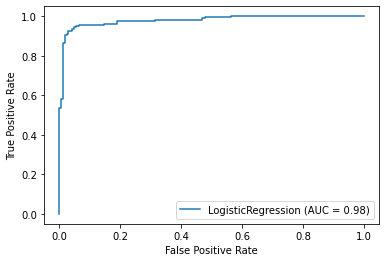

In [41]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix
plot_roc_curve(estimator=clf,y=y_test,X=X_test_dtm)
plt.show()

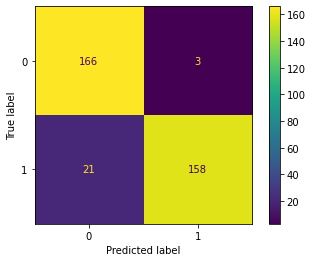

In [42]:
plot_confusion_matrix(estimator=clf,y_true=y_test,X=X_test_dtm)
plt.show()

In [ ]:
#DecisionTreeClassifier

In [39]:
import sklearn.metrics

In [142]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
from sklearn.model_selection import GridSearchCV

In [110]:
params = {'criterion':['gini','entropy'],'max_depth':[8,10,20,30,35,36,37,38,39,40,50]}
dtc = DecisionTreeClassifier()

gsearch = GridSearchCV(dtc,param_grid=params,cv=3,scoring='roc_auc')

In [111]:
clf = gsearch.fit(X_train_dtm,y_train)

In [112]:
y_train.value_counts()

1    407
0    402
Name: CLASS, dtype: int64

In [113]:
X_train_dtm

<809x7007 sparse matrix of type '<class 'numpy.int64'>'
	with 12945 stored elements in Compressed Sparse Row format>

In [114]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=36)

In [116]:
dtc = DecisionTreeClassifier(max_depth=36)

In [117]:
clf = dtc.fit(X_train_dtm,y_train)

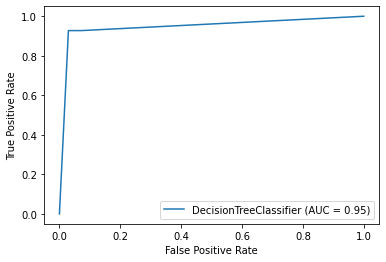

In [118]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix
plot_roc_curve(estimator=clf,y=y_test,X=X_test_dtm)
plt.show()

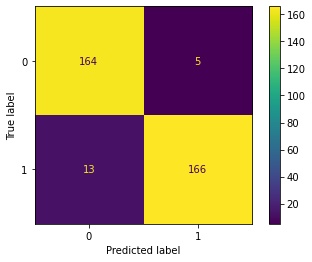

In [119]:
plot_confusion_matrix(estimator=clf,y_true=y_test,X=X_test_dtm)
plt.show()

In [ ]:
#RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
params = {'criterion':['gini','entropy'],'max_depth':[8,10,20,30,35,36,37,38,39,40,50]}
rfc = RandomForestClassifier(random_state=100)

gsearch = GridSearchCV(rfc,param_grid=params,cv=3,scoring='roc_auc')

In [164]:
clf3 = gsearch.fit(X_train_dtm,y_train)

In [165]:
y_train.value_counts()

1    407
0    402
Name: CLASS, dtype: int64

In [166]:
X_train_dtm

<809x7007 sparse matrix of type '<class 'numpy.int64'>'
	with 12945 stored elements in Compressed Sparse Row format>

In [167]:
clf3.best_estimator_

RandomForestClassifier(max_depth=35, random_state=100)

In [60]:
rfc = RandomForestClassifier(max_depth=35,random_state=150)

In [61]:
clf3 = rfc.fit(X_train_dtm,y_train)

In [62]:
y_train.value_counts()

1    407
0    402
Name: CLASS, dtype: int64

In [63]:
X_train_dtm

<809x7007 sparse matrix of type '<class 'numpy.int64'>'
	with 12945 stored elements in Compressed Sparse Row format>

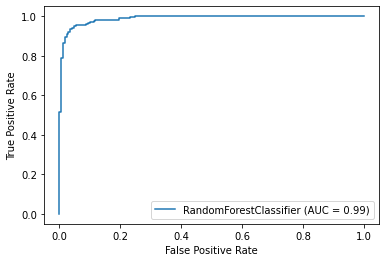

In [64]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix
plot_roc_curve(estimator=clf3,y=y_test,X=X_test_dtm)
plt.show()

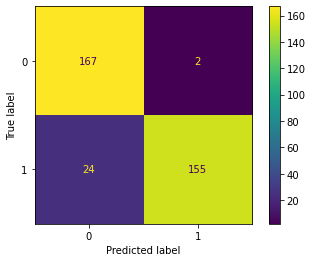

In [65]:
plot_confusion_matrix(estimator=clf3,y_true=y_test,X=X_test_dtm)
plt.show()

In [ ]:
#MultinomialNB

In [43]:
from sklearn.naive_bayes import MultinomialNB

In [44]:
gnb = MultinomialNB()

In [45]:
clf4 = gnb.fit(X_train_dtm.toarray(),y_train)

In [46]:
y_train.value_counts()

1    407
0    402
Name: CLASS, dtype: int64

In [47]:
X_train_dtm

<809x7007 sparse matrix of type '<class 'numpy.int64'>'
	with 12945 stored elements in Compressed Sparse Row format>

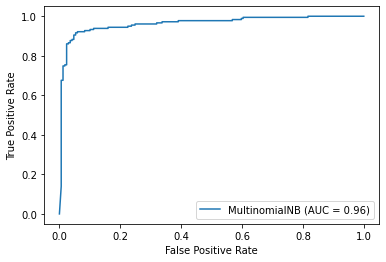

In [48]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix
plot_roc_curve(estimator=clf4,y=y_test,X=X_test_dtm.toarray())
plt.show()

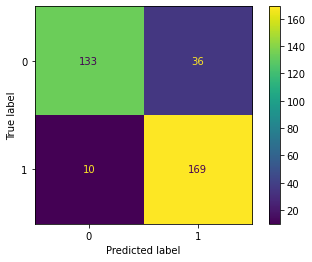

In [49]:
plot_confusion_matrix(estimator=clf4,y_true=y_test,X=X_test_dtm.toarray())
plt.show()

In [ ]:
#GradientBoostingClassifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [254]:
gbc = GradientBoostingClassifier()

In [193]:
clf5 = gbc.fit(X_train_dtm.toarray(),y_train)

In [194]:
y_train.value_counts()

1    407
0    402
Name: CLASS, dtype: int64

In [195]:
X_train_dtm

<809x7007 sparse matrix of type '<class 'numpy.int64'>'
	with 12945 stored elements in Compressed Sparse Row format>

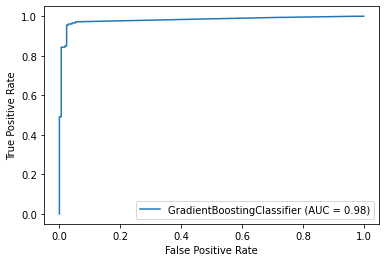

In [196]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix
plot_roc_curve(estimator=clf5,y=y_test,X=X_test_dtm.toarray())
plt.show()

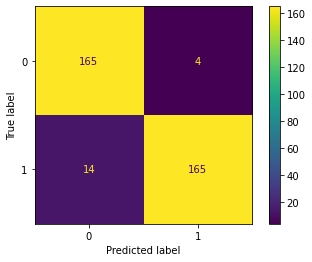

In [197]:
plot_confusion_matrix(estimator=clf5,y_true=y_test,X=X_test_dtm.toarray())
plt.show()

In [ ]:
#AdaBoostClassifier

In [66]:
from sklearn.ensemble import AdaBoostClassifier

In [67]:
abc = AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [68]:
clf6 = abc.fit(X_train_dtm,y_train)

In [69]:
y_train.value_counts()

1    407
0    402
Name: CLASS, dtype: int64

In [70]:
X_train_dtm

<809x7007 sparse matrix of type '<class 'numpy.int64'>'
	with 12945 stored elements in Compressed Sparse Row format>

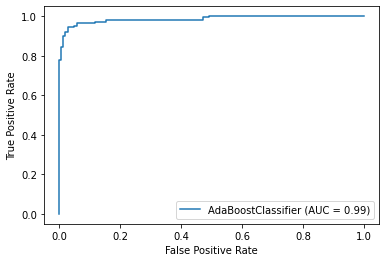

In [71]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix
plot_roc_curve(estimator=clf6,y=y_test,X=X_test_dtm)
plt.show()

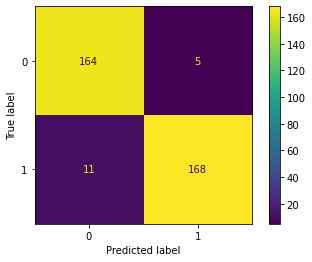

In [72]:
plot_confusion_matrix(estimator=clf6,y_true=y_test,X=X_test_dtm)
plt.show()

In [ ]:
#StackingClassifier

In [76]:
from sklearn.ensemble import StackingClassifier

In [310]:
sc = StackingClassifier(estimators=[('dtc' ,DecisionTreeClassifier(criterion='entropy',max_depth=36)),('rfc',RandomForestClassifier(criterion='entropy')),('lr',LogisticRegression())],final_estimator=RandomForestClassifier())

In [311]:
clf7 = sc.fit(X_train_dtm,y_train)

In [312]:
y_train

936     0
599     1
339     0
617     1
501     0
       ..
1044    1
1095    0
1130    1
860     0
1126    1
Name: CLASS, Length: 809, dtype: int64

In [313]:
y_train.value_counts()

1    407
0    402
Name: CLASS, dtype: int64

In [314]:
clf7.predict(X_test_dtm)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [315]:
X_train_dtm

<809x7007 sparse matrix of type '<class 'numpy.int64'>'
	with 12945 stored elements in Compressed Sparse Row format>

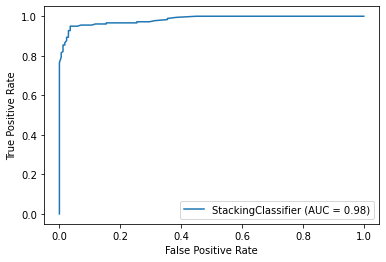

In [316]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix
plot_roc_curve(estimator=clf7,y=y_test,X=X_test_dtm)
plt.show()

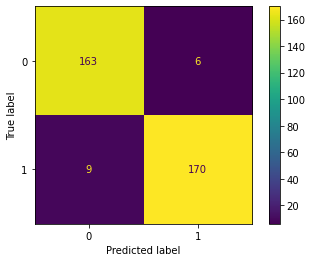

In [317]:
plot_confusion_matrix(estimator=clf7,y_true=y_test,X=X_test_dtm)
plt.show()

In [ ]:
#VotingClassifier

In [77]:
from sklearn.ensemble import VotingClassifier

In [127]:
vc = VotingClassifier(estimators=[('dtc' ,DecisionTreeClassifier(criterion='entropy',max_depth=36)),('rfc',RandomForestClassifier(criterion='entropy')),('lr',LogisticRegression())],voting='soft')

In [128]:
clf8 = vc.fit(X_train_dtm,y_train)

In [129]:
y_train

936     0
599     1
339     0
617     1
501     0
       ..
1044    1
1095    0
1130    1
860     0
1126    1
Name: CLASS, Length: 809, dtype: int64

In [130]:
y_train.value_counts()

1    407
0    402
Name: CLASS, dtype: int64

In [131]:
clf8.predict(X_test_dtm)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [132]:
clf8.predict_proba(X_test_dtm)

array([[9.64641436e-01, 3.53585638e-02],
       [9.70811536e-01, 2.91884638e-02],
       [4.23333569e-01, 5.76666431e-01],
       [9.42898242e-01, 5.71017578e-02],
       [9.74047157e-01, 2.59528429e-02],
       [3.40687254e-01, 6.59312746e-01],
       [8.75422396e-01, 1.24577604e-01],
       [9.61606375e-01, 3.83936253e-02],
       [9.90580498e-01, 9.41950237e-03],
       [1.06308194e-02, 9.89369181e-01],
       [3.93684858e-01, 6.06315142e-01],
       [9.75118877e-01, 2.48811226e-02],
       [9.11078136e-01, 8.89218636e-02],
       [9.87131584e-01, 1.28684155e-02],
       [8.64811048e-01, 1.35188952e-01],
       [9.77473520e-01, 2.25264802e-02],
       [8.59219338e-02, 9.14078066e-01],
       [9.65933237e-01, 3.40667633e-02],
       [9.87276680e-01, 1.27233201e-02],
       [1.24495624e-01, 8.75504376e-01],
       [1.07527054e-01, 8.92472946e-01],
       [9.74047157e-01, 2.59528429e-02],
       [9.51557371e-01, 4.84426291e-02],
       [9.51557371e-01, 4.84426291e-02],
       [1.356037

In [133]:
X_train_dtm

<809x7007 sparse matrix of type '<class 'numpy.int64'>'
	with 12945 stored elements in Compressed Sparse Row format>

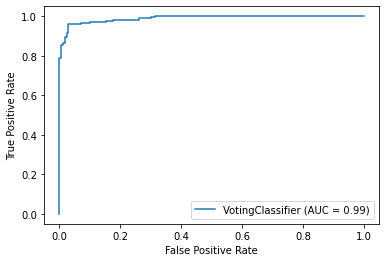

In [134]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix
plot_roc_curve(estimator=clf8,y=y_test,X=X_test_dtm)
plt.show()

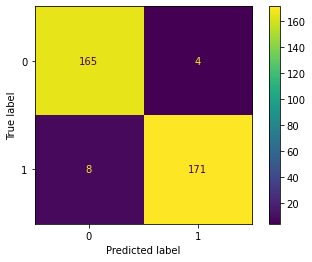

In [167]:
plot_confusion_matrix(estimator=clf8,y_true=y_test,X=X_test_dtm)
plt.show()

In [ ]:
#RandomForestClassifier with RandomizedSearchCV

In [48]:
from sklearn.pipeline import make_pipeline

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
param_distributions_rfc = [{
    'randomforestclassifier__criterion' : ['gini','entropy'],
    'randomforestclassifier__n_estimators': [int(x) for x in np.linspace(10, 200, num = 50)],
    'randomforestclassifier__max_depth': [int(x) for x in np.linspace(2, 10, num = 5)],
    'randomforestclassifier__max_features': ['auto', 'sqrt'],
}]

In [51]:
pipeline_rfc = make_pipeline(RandomForestClassifier(random_state=1))

In [52]:
rsRFC = RandomizedSearchCV(pipeline_rfc, param_distributions=param_distributions_rfc,
                            scoring='roc_auc',
                            cv = 10, refit=True,
                            random_state=1)

In [53]:
rsRFC.fit(X_train_dtm,y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('randomforestclassifier',
                                              RandomForestClassifier(random_state=1))]),
                   param_distributions=[{'randomforestclassifier__criterion': ['gini',
                                                                               'entropy'],
                                         'randomforestclassifier__max_depth': [2,
                                                                               4,
                                                                               6,
                                                                               8,
                                                                               10],
                                         'randomforestclassifier__max_features': ['auto',
                                                                                  'sqrt'],
                                         '

In [54]:
clf9 = rsRFC.best_estimator_
clf9

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=8,
                                        n_estimators=192, random_state=1))])

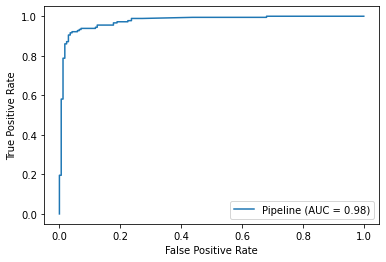

In [55]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix
plot_roc_curve(estimator=clf9,y=y_test,X=X_test_dtm)
plt.show()

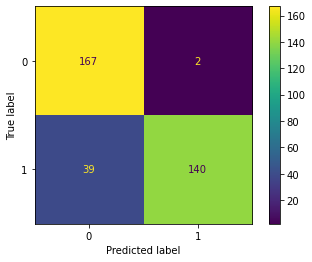

In [278]:
plot_confusion_matrix(estimator=clf9,y_true=y_test,X=X_test_dtm)
plt.show()

## Building the model on train data set and testing with the test data set

In [50]:
X = df_train['CONTENT']
y = df_train['CLASS']

In [51]:
toNumeric = CountVectorizer(stop_words='english',token_pattern = '[a-zA-Z0-9]+',ngram_range=(1,2))

In [52]:
toNumeric.fit(X)

CountVectorizer(ngram_range=(1, 2), stop_words='english',
                token_pattern='[a-zA-Z0-9]+')

In [53]:
wordsCV = toNumeric.get_feature_names()

In [54]:
wordsCV

['0',
 '0 02',
 '0 1',
 '0 amp',
 '0 efforts',
 '0 h',
 '0 lneadw26bfst76vhkjl8pxaey6vmnlvmriudtsfk6vy',
 '0 lneadw26bft',
 '0 lneadw26bftvzqt6juehasiefrjg1exi',
 '0 lneadw26bfunoarag71awgu6tjo6azdkfiun',
 '0 lneadw26bfvkahxpkenm25fywkyxthsupri6juqsznu',
 '0 margin',
 '0 padding',
 '0 src',
 '00',
 '00 43',
 '00 710000',
 '00 morning',
 '00 pass',
 '000',
 '000 000',
 '000 comment',
 '000 let',
 '000 month',
 '000 subscribers',
 '000 view',
 '002',
 '002 018',
 '018',
 '018 view',
 '02',
 '02 u',
 '034',
 '034 783',
 '04',
 '04 katy',
 '047000',
 '047000 croatia',
 '05',
 '05 hahahahah',
 '053012',
 '053012 jpg',
 '08',
 '08 little',
 '09',
 '09 26t22',
 '0d878a889c',
 '0f9fa8aa',
 '0f9fa8aa 243a',
 '0laviqu2b',
 '1',
 '1 00',
 '1 000',
 '1 57',
 '1 700',
 '1 710',
 '1 884',
 '1 africa',
 '1 amp',
 '1 bil',
 '1 billion',
 '1 cup',
 '1 day',
 '1 dollar',
 '1 ff3',
 '1 half',
 '1 icep',
 '1 know',
 '1 lt',
 '1 mabey',
 '1 man',
 '1 million',
 '1 millioon',
 '1 penny',
 '1 person',
 '1 se

In [55]:
len(wordsCV)

9590

In [56]:
X_train_dtmF = toNumeric.transform(X)

In [57]:
X_train_dtmF

<1157x9590 sparse matrix of type '<class 'numpy.int64'>'
	with 19122 stored elements in Compressed Sparse Row format>

In [58]:
X_train_dtmF.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [59]:
Xtest = df_test.CONTENT

In [60]:
X_test_dtmF = toNumeric.transform(Xtest)
X_test_dtmF

<799x9590 sparse matrix of type '<class 'numpy.int64'>'
	with 7852 stored elements in Compressed Sparse Row format>

In [61]:
X_test_dtmF.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
#LogisticRegression

In [62]:
lr = LogisticRegression()

In [63]:
clf_1 = lr.fit(X_train_dtmF,y)

In [64]:
y_pred = clf_1.predict(X_test_dtmF)

In [65]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [66]:
csv1=pd.DataFrame([df_test['ID'],y_pred],index=['ID','CLASS']).T

csv1.head()

,ID,CLASS
0,0,1
1,1,0
2,2,1
3,3,0
4,4,1


In [67]:
csv1['CLASS'].value_counts()

0    412
1    387
Name: CLASS, dtype: int64

In [68]:
csv1.to_csv("Advertisement_or_not.csv",index=False)

In [69]:
csv1

,ID,CLASS
0,0,1
1,1,0
2,2,1
3,3,0
4,4,1
...,...,...
794,794,1
795,795,0
796,796,0
797,797,0


In [70]:
#RandomForestClassifier

In [78]:
rfc = RandomForestClassifier()

In [79]:
clf_2 = rfc.fit(X_train_dtmF,y)

In [91]:
pd.DataFrame(clf_2.feature_importances_,index=wordsCV,columns=['imp']).sort_values('imp',ascending=False)

,imp
check,0.079897
subscribe,0.076215
channel,0.034899
com,0.026700
youtube,0.023369
...,...
long ago,0.000000
lol want,0.000000
lol m,0.000000
lol d,0.000000


In [80]:
y_pred = clf_2.predict(X_test_dtmF)

In [81]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [82]:
csv1=pd.DataFrame([df_test['ID'],y_pred],index=['ID','CLASS']).T

csv1.head()

,ID,CLASS
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1


In [83]:
csv1['CLASS'].value_counts()

0    407
1    392
Name: CLASS, dtype: int64

In [84]:
csv1.to_csv("Advertisement_or_not.csv",index=False)

In [ ]:
##GradientBoostingClassifier

In [211]:
clf_3 = gbc.fit(X_train_dtmF,y)

In [213]:
y.value_counts()

1    586
0    571
Name: CLASS, dtype: int64

In [214]:
X_train_dtm

<1157x9590 sparse matrix of type '<class 'numpy.int64'>'
	with 19122 stored elements in Compressed Sparse Row format>

In [216]:
y_pred = clf_3.predict(X_test_dtmF)

In [217]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [218]:
csv1=pd.DataFrame([df_test['ID'],y_pred],index=['ID','CLASS']).T

csv1.head()

,ID,CLASS
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [219]:
csv1['CLASS'].value_counts()

0    411
1    388
Name: CLASS, dtype: int64

In [220]:
csv1.to_csv("Advertisement_or_not.csv",index=False)

In [ ]:
#AdaBoostClassifier

In [385]:
abc = AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [386]:
clf_4 = abc.fit(X_train_dtmF,y)

In [387]:
y.value_counts()

1    586
0    571
Name: CLASS, dtype: int64

In [388]:
X_train_dtm

<809x7007 sparse matrix of type '<class 'numpy.int64'>'
	with 12945 stored elements in Compressed Sparse Row format>

In [389]:
y_pred = clf_4.predict(X_test_dtmF)

In [390]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [391]:
csv1=pd.DataFrame([df_test['ID'],y_pred],index=['ID','CLASS']).T

csv1.head()

,ID,CLASS
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1


In [392]:
csv1['CLASS'].value_counts()

0    408
1    391
Name: CLASS, dtype: int64

In [393]:
csv1.to_csv("Advertisement_or_not.csv",index=False)

In [ ]:
#StackingClassifier

In [109]:
from sklearn.ensemble import StackingClassifier

In [240]:
sc = StackingClassifier(estimators=[('dtc' ,DecisionTreeClassifier(criterion='entropy',max_depth=36)),('rfc',RandomForestClassifier(criterion='entropy')),('lr',LogisticRegression(solver='lbfgs'))],final_estimator=RandomForestClassifier())

In [241]:
clf_5 = sc.fit(X_train_dtmF,y)

In [242]:
y.value_counts()

1    586
0    571
Name: CLASS, dtype: int64

In [75]:
X_train_dtm

<809x7007 sparse matrix of type '<class 'numpy.int64'>'
	with 12945 stored elements in Compressed Sparse Row format>

In [244]:
y_pred = clf_5.predict(X_test_dtmF)

In [245]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [246]:
csv1=pd.DataFrame([df_test['ID'],y_pred],index=['ID','CLASS']).T

csv1.head()

,ID,CLASS
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1


In [247]:
csv1['CLASS'].value_counts()

1    414
0    385
Name: CLASS, dtype: int64

In [248]:
csv1.to_csv("Advertisement_or_not.csv",index=False)

In [ ]:
#VotingClassifier

In [135]:
from sklearn.ensemble import VotingClassifier

In [136]:
vc = VotingClassifier(estimators=[('dtc' ,DecisionTreeClassifier(criterion='entropy',max_depth=36)),('rfc',RandomForestClassifier(criterion='entropy')),('lr',LogisticRegression())],voting='soft')

In [137]:
clf_6 = vc.fit(X_train_dtmF,y)

In [138]:
y.value_counts()

1    586
0    571
Name: CLASS, dtype: int64

In [139]:
X_train_dtmF

<1157x9590 sparse matrix of type '<class 'numpy.int64'>'
	with 19122 stored elements in Compressed Sparse Row format>

In [140]:
y_pred = clf_6.predict(X_test_dtmF)

In [141]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [142]:
csv1=pd.DataFrame([df_test['ID'],y_pred],index=['ID','CLASS']).T

csv1.head()

,ID,CLASS
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1


In [143]:
csv1['CLASS'].value_counts()

1    410
0    389
Name: CLASS, dtype: int64

In [144]:
csv1.to_csv("Advertisement_or_not.csv",index=False)

In [122]:
pd.read_csv('Advertisement_or_not.csv')

,ID,CLASS
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1
...,...,...
794,794,1
795,795,0
796,796,0
797,797,0


## Checking with TfidfVectorizer

In [18]:
X = df_train['CONTENT']
y = df_train['CLASS']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [73]:
toNumeric_tfidf = TfidfVectorizer(stop_words='english',token_pattern = '[a-zA-Z0-9]+',ngram_range=(1,2))

In [74]:
toNumeric_tfidf.fit(X_train)

TfidfVectorizer(ngram_range=(1, 2), stop_words='english',
                token_pattern='[a-zA-Z0-9]+')

In [75]:
wordsCV = toNumeric_tfidf.get_feature_names()

In [76]:
wordsCV

['0',
 '0 1',
 '0 amp',
 '0 h',
 '0 margin',
 '0 padding',
 '0 src',
 '000',
 '000 000',
 '000 comment',
 '000 month',
 '000 subscribers',
 '000 view',
 '034',
 '034 783',
 '04',
 '04 katy',
 '05',
 '05 hahahahah',
 '053012',
 '053012 jpg',
 '08',
 '08 little',
 '0d878a889c',
 '0f9fa8aa',
 '0f9fa8aa 243a',
 '0laviqu2b',
 '1',
 '1 000',
 '1 57',
 '1 710',
 '1 884',
 '1 africa',
 '1 amp',
 '1 bil',
 '1 billion',
 '1 day',
 '1 ff3',
 '1 icep',
 '1 lt',
 '1 mabey',
 '1 million',
 '1 millioon',
 '1 penny',
 '1 song',
 '1 thank',
 '1 waka',
 '1 year',
 '10',
 '10 months',
 '100',
 '100 100',
 '100 subs',
 '100 subscribers',
 '10000000',
 '10000000 subscribers',
 '10001',
 '10001 amp',
 '100877300245414',
 '100877300245414 https',
 '10200253113705769',
 '10200253113705769 amp',
 '1024',
 '1024 katy',
 '104999962146104962510',
 '104999962146104962510 oid',
 '104999962146104962510 supermariologan',
 '10626048',
 '10626048 expendables',
 '1073741828',
 '1073741828 1496241863981208',
 '1073741830

In [77]:
len(wordsCV)

7007

In [78]:
X_train_dtm_tfidf = toNumeric_tfidf.transform(X_train)

In [80]:
X_train_dtm_tfidf

<809x7007 sparse matrix of type '<class 'numpy.float64'>'
	with 12945 stored elements in Compressed Sparse Row format>

In [81]:
X_train_dtm_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
X_test_dtm_tfidf = toNumeric_tfidf.transform(X_test)
X_test_dtm_tfidf

<348x7007 sparse matrix of type '<class 'numpy.float64'>'
	with 3384 stored elements in Compressed Sparse Row format>

In [85]:
X_test_dtm_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()

In [86]:
clf = lr.fit(X_train_dtm_tfidf,y_train)

In [87]:
y_train.value_counts()

1    407
0    402
Name: CLASS, dtype: int64

In [88]:
X_train_dtm_tfidf

<809x7007 sparse matrix of type '<class 'numpy.float64'>'
	with 12945 stored elements in Compressed Sparse Row format>

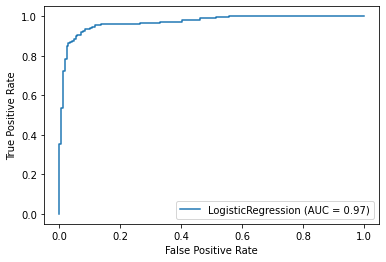

In [89]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix
plot_roc_curve(estimator=clf,y=y_test,X=X_test_dtm_tfidf)
plt.show()

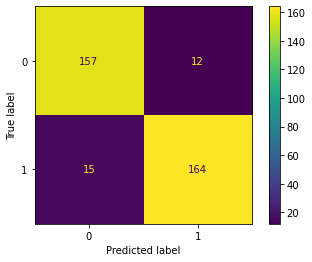

In [90]:
plot_confusion_matrix(estimator=clf,y_true=y_test,X=X_test_dtm_tfidf)
plt.show()